# Project: `Engineering Graduate Salary Prediction`


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#corr">Correlation between features</a></li>
<li><a href="#Machine">Machine Learning Model</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## **Introduction**
Engineering Graduates in India
India has a total 3000 Engineering and Technology Institutions in which around 2.9 million students are enrolled. Every year on an average 1.5 million students get their degree in engineering, but due to lack of skill required to perform technical jobs less than 20 percent get employment in their core domain. [source of information: BWEDUCATION]

### Analysis of the DataSet (questions that is analyized in the dataset):
**Objective:**

Relevant question are:

>1-what determines the salary and the jobs these engineers are offered right after graduation. 
>
>2-Various factors such as college grades, candidate skills, the proximity of the college to industrial hubs, the specialization one have, market conditions for specific industries determine this. 
>
>3-On the basis of these various factors, your objective is to determine the salary of an engineering graduate in India.

### **Data Description:**
><li>ID: A unique ID to identify a candidate</li>
>
><li>Salary: Annual CTC offered to the candidate (in INR)</li>
><li>Gender: Candidate's gender</li>
><li>DOB: Date of birth of the candidate</li>
><li>10percentage: Overall marks obtained in grade 10 examinations</li>
><li>10board: The school board whose curriculum the candidate followed in grade 10</li>
><li>12graduation: Year of graduation - senior year high school</li>
><li>12percentage: Overall marks obtained in grade 12 examinations</li>
><li>12board: The school board whose curriculum the candidate followed</li>
><li>CollegeID: Unique ID identifying the university/college which the candidate attended for her/his undergraduate</li>
><li>CollegeTier: Each college has been annotated as 1 or 2. The annotations have been computed from the average AMCAT scores obtained by the students in the college/university. Colleges with an average score above a threshold are tagged as 1 and others as 2.</li>
><li>Degree: Degree obtained/pursued by the candidate</li>
><li>Specialization: Specialization pursued by the candidate</li>
><li>CollegeGPA: Aggregate GPA at graduation</li>
><li>CollegeCityID: A unique ID to identify the city in which the college is located in.</li>
><li>CollegeCityTier: The tier of the city in which the college is located in. This is annotated based on the population of the cities.</li>
><li>CollegeState: Name of the state in which the college is located</li>
><li>GraduationYear: Year of graduation (Bachelor's degree)</li>
><li>English: Scores in AMCAT English section</li>
><li>Logical: Score in AMCAT Logical ability section</li>
><li>Quant: Score in AMCAT's Quantitative ability section</li>
><li>Domain: Scores in AMCAT's domain module</li>
><li>ComputerProgramming: Score in AMCAT's Computer programming section</li>
><li>ElectronicsAndSemicon: Score in AMCAT's Electronics & Semiconductor Engineering section</li>
><li>ComputerScience: Score in AMCAT's Computer Science section</li>
><li>MechanicalEngg: Score in AMCAT's Mechanical Engineering section</li>
><li>ElectricalEngg: Score in AMCAT's Electrical Engineering section</li>
><li>TelecomEngg: Score in AMCAT's Telecommunication Engineering section</li>
><li>CivilEngg: Score in AMCAT's Civil Engineering section</li>
><li>conscientiousness: Scores in one of the sections of AMCAT's personality test</li>
><li>agreeableness: Scores in one of the sections of AMCAT's personality test</li>
><li>extraversion: Scores in one of the sections of AMCAT's personality test</li>
><li>nueroticism: Scores in one of the sections of AMCAT's personality test</li>
><li>openess_to_experience: Scores in one of the sections of AMCAT's personality test</li>
**Note: **To give you more context AMCAT is a job portal.

### **Overview**

we will try to uncover the factors that affect an Indian engineering graduate’s salary and subsequently select only relevant categories that have high impact on the salary. The cleaned data will be ready for any regression algorithm to be used which can predict the salary.

In [235]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression,LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LogisticRegression,LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,cross_validate

<a id="cleaning"></a>
## **Data Cleaning**


> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions. We will start with standard properties of the cleaning the dataset

### Questions that proved with answers:
>1- If data is empty of missing values ?
>
>2- Are columns affect on the main reason of using dataset?
>
>3- we should find the data has duplicated values?

In [314]:
df = pd.read_csv('./Data sets/Engineering_graduate_salary.csv')
print("Dimensions of DF: ", df.shape)
print("\nInformation about DF: ")
print(df.info())
# print("\nHead of DF: \n", df.head(5))

Dimensions of DF:  (2998, 34)

Information about DF: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  Co

`First insight:`

As you can see this dataset is fully with values and no missing values in it.

####  Now lets analyze the data and get basic overview of what we’re dealing with:

In [237]:
df.columns

Index(['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary'],
      dtype='object')

Now if we observe carefully, there are some columns that obviously do not affect salaries like 'ID' , 'DOB', boards of 10th and 12th and so on. We will get rid of these redundant columns.

In [238]:
df = df.drop(['ID', 'DOB', 'CollegeID', '12graduation' ,'GraduationYear','10board', '12board' , 'CollegeState','CollegeCityID', 'CollegeCityTier',],axis = 1)
df.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,650,665,810,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,440,435,210,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,485,475,505,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,575,495,365,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


`Second insight:`

Already we drop 10 columns that we saw they did not a shape of interest as we predict the salary.

In [239]:
df.duplicated().sum()

0

`Third insight:`

No duplicated values ,too.

we see that there are no duplicates to take care of

In [240]:
df.Specialization.value_counts()

electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
instrumentation and control engineering         18
information science engineering                 18
electronics and instrumentation engineering     18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
applied electronics and instrum

If we observe this, we can understand that there are a lot of single values which can unnecessarily affect the model if we try to train it using this data. Let’s group this data together as they’re not adding much value to the 'tion' as a whole.

In [241]:
specialization = df.Specialization.value_counts() 
lessthan10 = specialization[specialization<=10]
lessthan10
def correctSpecialization(val):
    if val in lessthan10:
        return 'Others'
    else:
        return val
df['Specialization'] = df['Specialization'].apply(correctSpecialization)
df['Specialization'].value_counts()

electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
Others                                          76
electrical engineering                          63
electronics & instrumentation eng               24
electronics and instrumentation engineering     18
instrumentation and control engineering         18
information science engineering                 18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
Name: Specialization, dtype: int64

This data seems like something we can work with.

In [242]:
df.shape

(2998, 24)

In [243]:
df.describe()

,10percentage,12percentage,CollegeTier,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
count,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,...,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2.998000e+03
mean,77.666264,74.341061,1.924616,71.509857,501.066378,500.431621,514.137759,0.508458,351.868579,96.228152,...,24.138759,16.267845,31.068379,1.946965,-0.038714,0.126217,-0.008662,-0.145965,-0.141111,3.051748e+05
std,10.002785,11.120299,0.264053,8.122462,105.304512,87.299850,122.194955,0.463373,204.526227,158.737747,...,99.785138,86.054739,103.552963,32.241501,1.024974,0.955831,0.962695,1.012901,1.007134,2.123312e+05
min,43.000000,40.000000,1.000000,6.630000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-3.893300,-5.781600,-4.600900,-2.643000,-7.375700,3.500000e+04
25%,71.140000,66.000000,2.000000,66.530000,425.000000,441.250000,430.000000,0.342315,295.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-0.649100,-0.435300,-0.604800,-0.868200,-0.669200,1.800000e+05
50%,78.965000,74.000000,2.000000,71.800000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.172700,-0.094300,3.000000e+05
75%,85.600000,82.600000,2.000000,76.300000,570.000000,565.000000,595.000000,0.835612,495.000000,233.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400,3.700000e+05
max,97.760000,98.700000,2.000000,99.930000,875.000000,795.000000,900.000000,0.999910,804.000000,612.000000,...,623.000000,660.000000,548.000000,500.000000,1.995300,1.904800,2.161700,3.352500,1.630200,4.000000e+06


If we observe we can see that GPA has max value 99.93 and min value 6.63 which is a big range and 6.63 probably is 

some wrong value. We don’t know that yet! But, something seems definitely wrong! Let’s analyze this and see if we can 

get rid of the outliers if any.

so, we start working with visulizations to show the relationships between features.

<a id="#eda"></a>

## **Exploratory Data Analysis**

>**Tip:** How to implement the whole operations and functions while analysing the dataset by using
>visulization plots finding relationships and statistc calculations that are providing in this section

### Relivent questions:

> 4-How we can detect the outliers in a feature and it would we delete it?
>
> 5-Are there any relationships between features?
>
> 6-Is there any state of linearity if found between 2 features?
>
> 7-Try to make a visualized plot to predict which values are effected by other features?

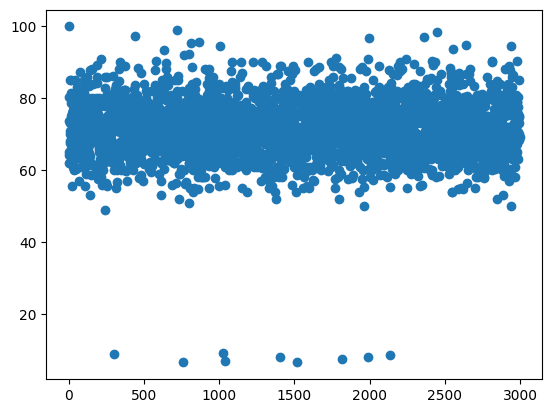

In [244]:
plt.scatter(df.index,df['collegeGPA'])

`Forth insight:`

This plot clearly shows that the values mostly lie in 50–100 range and we can safely drop values less than 20 which can introduce unnecessary bias.

In [245]:
df = df[(df['collegeGPA'] > 40)]
df

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,650,665,810,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,440,435,210,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,485,475,505,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,575,495,365,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,f,75.00,73.00,2,B.Tech/B.E.,electronics and communication engineering,70.00,505,485,445,...,-1,-1,-1,-1,-1.1901,0.9688,-1.0697,1.35490,0.0284,120000
2994,f,84.00,77.00,2,B.Tech/B.E.,information technology,75.20,345,585,395,...,-1,-1,-1,-1,-0.1082,0.0328,-0.4891,-0.29020,0.5024,120000
2995,m,91.40,65.56,2,B.Tech/B.E.,information technology,73.19,385,425,485,...,-1,-1,-1,-1,-0.8810,0.1888,-0.3440,0.06230,0.6603,385000
2996,m,88.64,65.16,2,B.Tech/B.E.,computer engineering,74.81,465,645,505,...,-1,-1,-1,-1,1.4374,1.2808,-0.4891,-1.46537,0.5419,530000


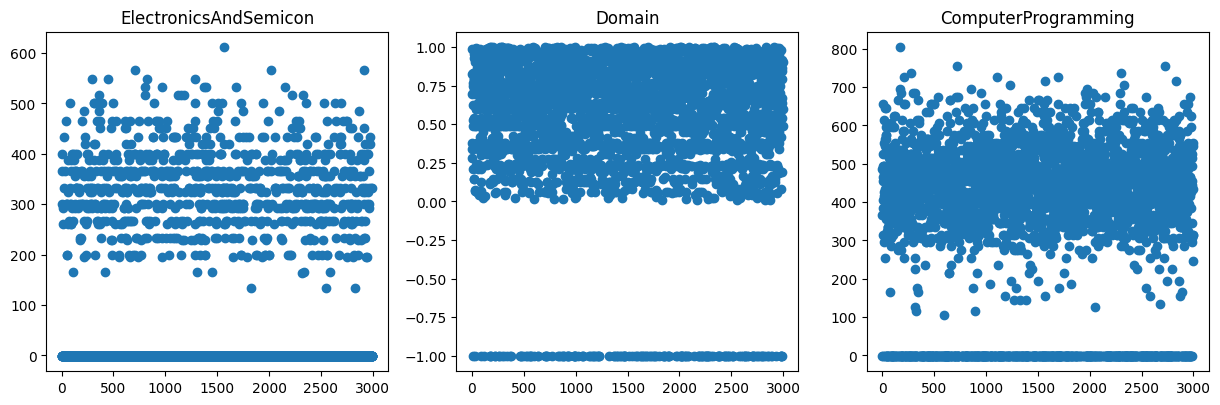

In [246]:
plt.figure(figsize = (15,15))
plt.subplot(3,3,1)
plt.scatter(df.index, df.ElectronicsAndSemicon)
plt.title('ElectronicsAndSemicon')
plt.subplot(3,3,2)
plt.scatter(df.index, df.Domain)
plt.title('Domain')
plt.subplot(3,3,3)
plt.scatter(df.index, df.ComputerProgramming)
plt.title('ComputerProgramming')
plt.show()

In [247]:
df = df.replace(-1,np.nan)
cols_with_nan = [col for col in df.columns if df.isna().sum()[col]>0]
for col in cols_with_nan:
    df[col] = df[col].fillna(df[col].mean())
df

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,650,665,810,...,401.174863,423.336066,349.879562,341.96,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,440,435,210,...,401.174863,423.336066,349.879562,341.96,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,485,475,505,...,401.174863,423.336066,260.000000,341.96,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,...,401.174863,423.336066,349.879562,341.96,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,575,495,365,...,401.174863,423.336066,349.879562,341.96,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,f,75.00,73.00,2,B.Tech/B.E.,electronics and communication engineering,70.00,505,485,445,...,401.174863,423.336066,349.879562,341.96,-1.1901,0.9688,-1.0697,1.35490,0.0284,120000
2994,f,84.00,77.00,2,B.Tech/B.E.,information technology,75.20,345,585,395,...,401.174863,423.336066,349.879562,341.96,-0.1082,0.0328,-0.4891,-0.29020,0.5024,120000
2995,m,91.40,65.56,2,B.Tech/B.E.,information technology,73.19,385,425,485,...,401.174863,423.336066,349.879562,341.96,-0.8810,0.1888,-0.3440,0.06230,0.6603,385000
2996,m,88.64,65.16,2,B.Tech/B.E.,computer engineering,74.81,465,645,505,...,401.174863,423.336066,349.879562,341.96,1.4374,1.2808,-0.4891,-1.46537,0.5419,530000


I’ve replaced the -1 values with nan first then replaced all those with the mean values of those columns.

Now if we compare this with original data, we can definitely observe that our new data is much more clean and 
workable with. It contains values that are uniform and affect the salary in some way.

<Axes: xlabel='Gender', ylabel='count'>

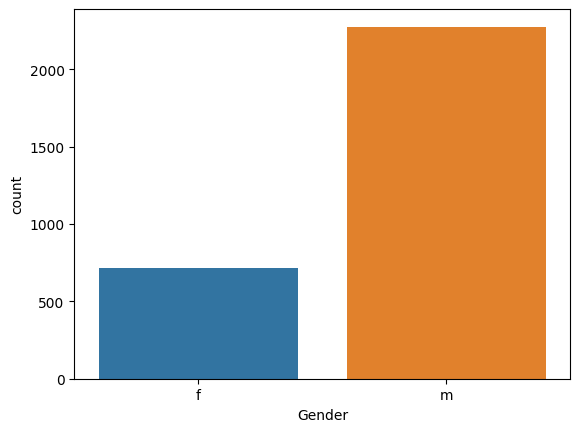

In [248]:
sns.countplot(x=df.Gender)

`Fifth insight:`

malesare more than Females  4 times almost.

<Axes: xlabel='10percentage', ylabel='12percentage'>

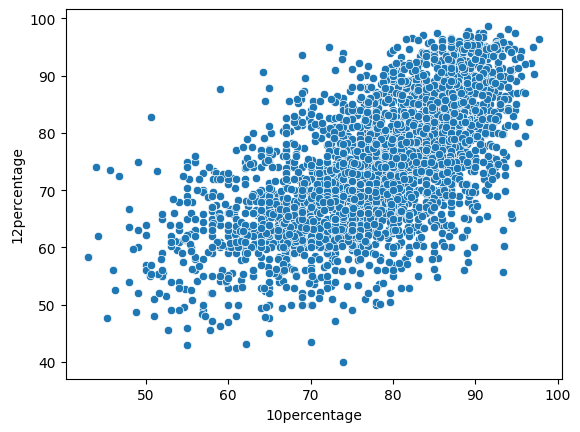

In [249]:
sns.scatterplot(x=df['10percentage'], y=df['12percentage'])

`Sixth insight:`

Clearly, a linearity can be seen here between 10th and 12th percentage.
>
>Positive strong linear relationship

<Axes: xlabel='collegeGPA', ylabel='Salary'>

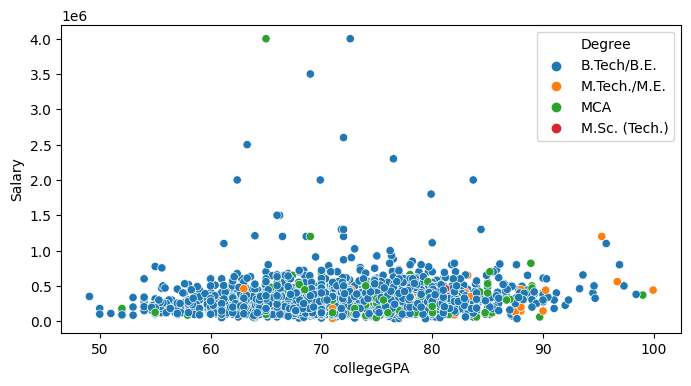

In [250]:
plt.figure(figsize = (8,4))
sns.scatterplot(x= df.collegeGPA,y = df.Salary, hue = df.Degree)

`Seventh insight:`

Here, we can observe that mostly B.Tech/B.E. students are getting jobs with higher salaries. Similarly other columns can be compared with salary.

In [251]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

<Axes: ylabel='Degree'>

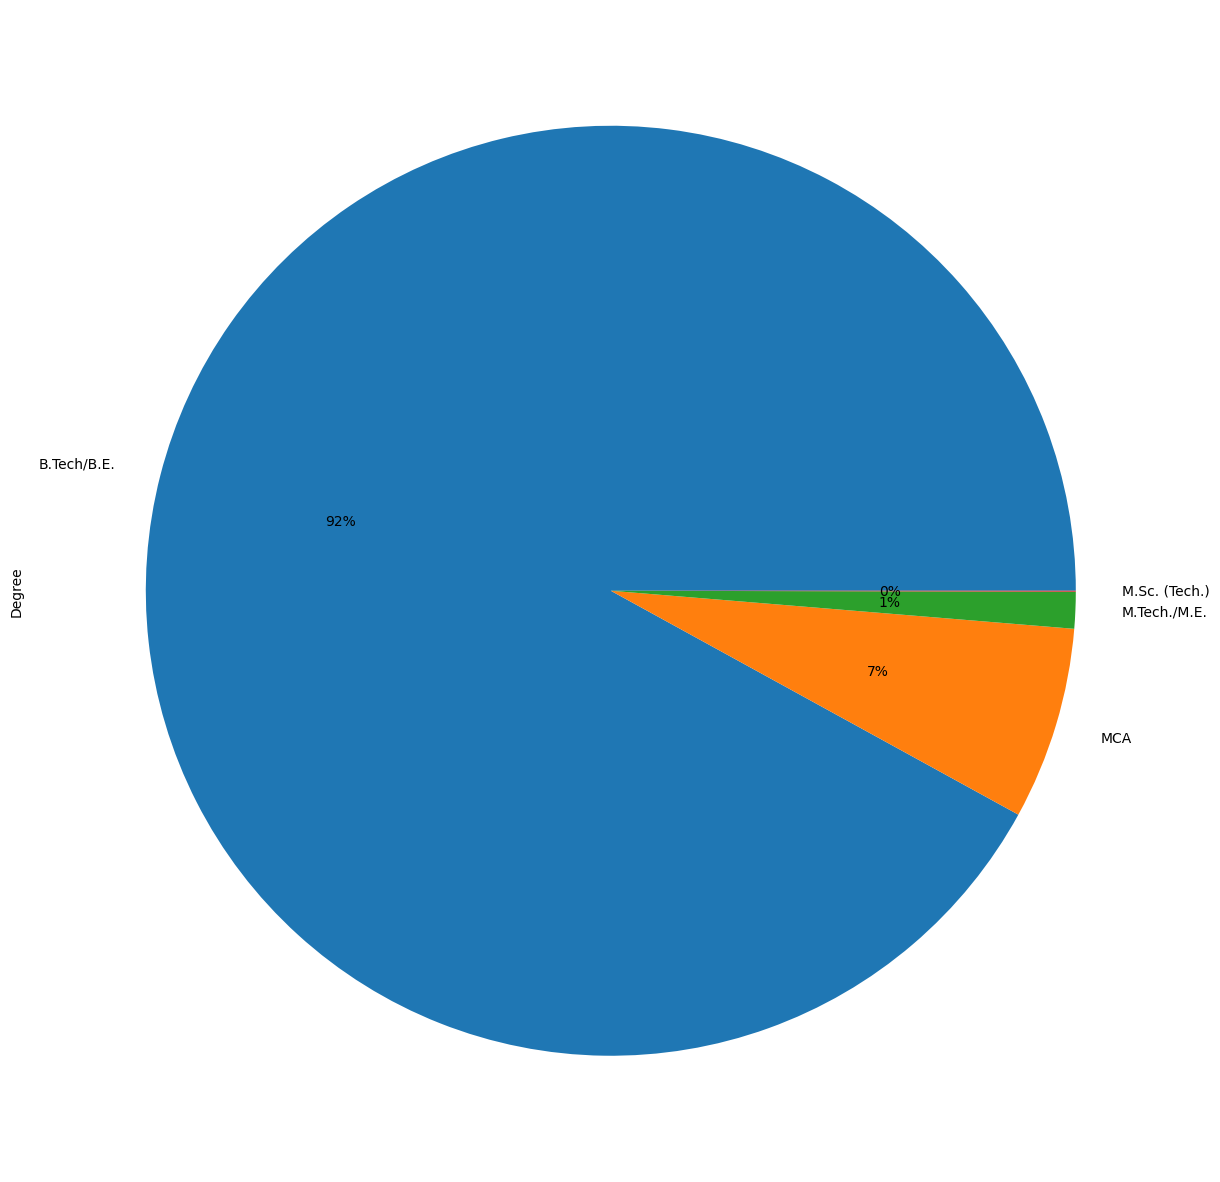

In [252]:
plt.figure(figsize = (15,20))
df['Degree'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')

we see that the B.Tech/B.E is already has the most percentage.

Now let us see if there is any relation between `‘openess_to_experience’` and `salary`. It can be observed that higher scores graduates get higher salaries.

<Axes: xlabel='openess_to_experience', ylabel='Salary'>

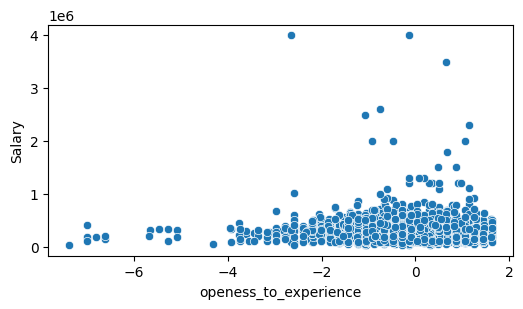

In [253]:
plt.figure(figsize = (6,3))
sns.scatterplot(x= df.openess_to_experience,y =df.Salary)

and then we will make some calculations for each feature in the dataset to gather all information that we need.
>
>this piece of data has left skewed plot to most favourite scores between (0 to 2)

As example i need to know the quartile and boxplot:

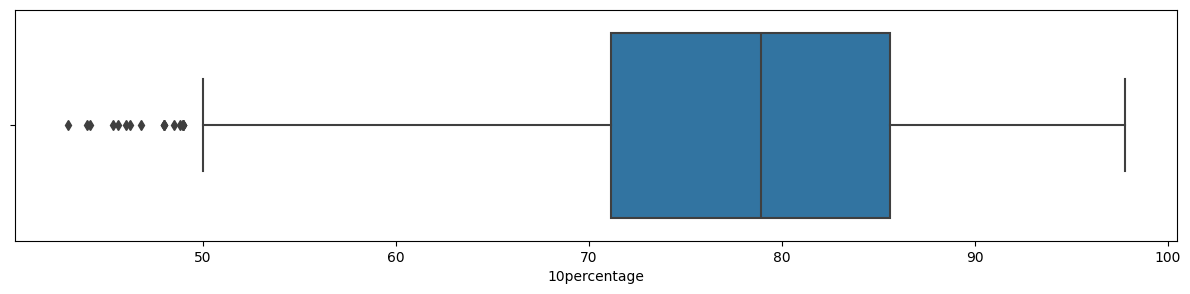

In [254]:
plt.figure(figsize=(15,3))
sns.boxplot(x=df['10percentage'])
plt.show()

In [255]:
lower_limit = 72 - 1.5 * 14.4
lower_limit

50.4

In [256]:
df['10percentage']=df["10percentage"].map(lambda x:51 if x <51 else x)
df['10percentage'].head()

0    87.80
1    57.00
2    77.33
3    84.30
4    82.00
Name: 10percentage, dtype: float64

<Axes: xlabel='12percentage'>

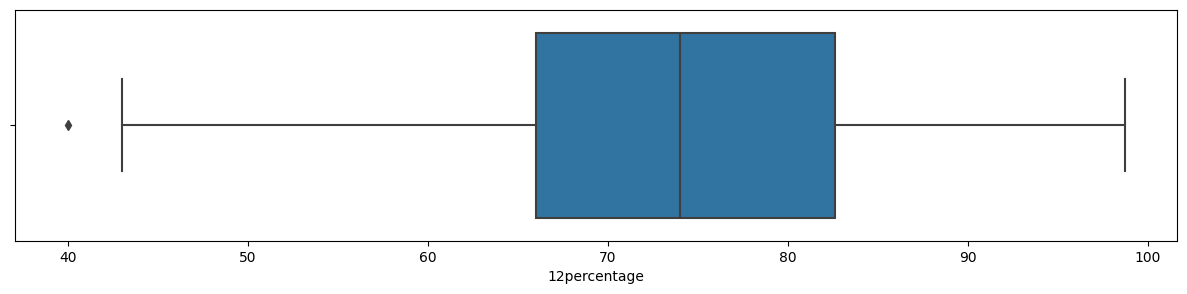

In [257]:
plt.figure(figsize=(15,3))
sns.boxplot(x=df['12percentage'])

In [258]:
lower_limit = 66.4 - 1.5 * 16.6
lower_limit

41.5

In [259]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print('---------IQR----------------')
print(IQR)
print('----------Q1-----------------')
print(Q1)
print('-----------Q3---------------')
print(Q3)

---------IQR----------------
10percentage                 14.430000
12percentage                 16.600000
CollegeTier                   0.000000
collegeGPA                    9.700000
English                     145.000000
Logical                     120.000000
Quant                       165.000000
Domain                        0.460069
ComputerProgramming          90.000000
ElectronicsAndSemicon         0.000000
ComputerScience               0.000000
MechanicalEngg                0.000000
ElectricalEngg                0.000000
TelecomEngg                   0.000000
CivilEngg                     0.000000
conscientiousness             1.351800
agreeableness                 1.248100
extraversion                  1.276800
nueroticism                   1.394400
openess_to_experience         1.171600
Salary                   190000.000000
dtype: float64
----------Q1-----------------
10percentage                 71.170000
12percentage                 66.000000
CollegeTier                  

In [ ]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)
    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()
        
for col in df:
    num_summary(df, col, plot=True)

This a code that print all statistics for the mathmatical columns with their histogram`s.

It does not have a need to print them as its big length.

<a id="corr"></a>
## **Correlation between features**

### Relivent question:

> Make a correlation between any proper 2 features to know which feature is depend on other?

### here we can make a correlation relationships between features.

In [261]:
df.corr()

,10percentage,12percentage,CollegeTier,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
10percentage,1.000000,0.647092,-0.143173,0.345947,0.349126,0.308257,0.330035,0.162042,0.150560,0.052242,...,0.079021,3.198789e-02,5.583801e-02,2.026931e-02,0.067450,0.136435,-0.007396,-0.131267,0.034027,0.180407
12percentage,0.647092,1.000000,-0.110689,0.383050,0.211317,0.237327,0.317179,0.153549,0.126121,0.071574,...,0.068832,3.873382e-02,6.661772e-02,7.153767e-03,0.057030,0.099520,-0.012132,-0.088875,0.006520,0.171857
CollegeTier,-0.143173,-0.110689,1.000000,-0.112850,-0.185036,-0.193863,-0.250948,-0.111776,-0.155722,-0.062350,...,-0.066817,-4.351807e-03,-5.500445e-02,7.472688e-04,0.044231,-0.041604,-0.010698,0.034016,-0.027941,-0.175449
collegeGPA,0.345947,0.383050,-0.112850,1.000000,0.105589,0.204384,0.242410,0.195387,0.212842,0.078152,...,0.094402,4.698652e-02,7.222834e-02,2.566506e-02,0.063808,0.064777,-0.060916,-0.076370,0.016189,0.149643
English,0.349126,0.211317,-0.185036,0.105589,1.000000,0.440571,0.374601,0.230251,0.253355,0.097191,...,0.048944,3.124779e-02,6.371457e-02,1.728192e-02,0.028953,0.190657,0.006642,-0.147732,0.073021,0.178810
Logical,0.308257,0.237327,-0.193863,0.204384,0.440571,1.000000,0.509078,0.320202,0.373357,0.109593,...,0.073828,6.315639e-02,7.066090e-02,-1.099596e-03,0.017979,0.157763,-0.005843,-0.188147,0.048390,0.192844
Quant,0.330035,0.317179,-0.250948,0.242410,0.374601,0.509078,1.000000,0.346367,0.361623,0.137522,...,0.104000,1.045664e-01,6.643301e-02,3.717391e-02,-0.008725,0.101539,-0.038441,-0.143448,0.024100,0.238025
Domain,0.162042,0.153549,-0.111776,0.195387,0.230251,0.320202,0.346367,1.000000,0.498840,0.536999,...,0.231584,1.844384e-01,8.676399e-02,6.757593e-02,-0.004733,0.083885,-0.032376,-0.106239,0.022667,0.184818
ComputerProgramming,0.150560,0.126121,-0.155722,0.212842,0.253355,0.373357,0.361623,0.498840,1.000000,0.056923,...,0.019159,1.668467e-02,3.198802e-02,1.838015e-02,-0.007234,0.101710,-0.019722,-0.120006,0.027258,0.189329
ElectronicsAndSemicon,0.052242,0.071574,-0.062350,0.078152,0.097191,0.109593,0.137522,0.536999,0.056923,1.000000,...,0.015067,3.782758e-02,8.071037e-02,1.504443e-02,-0.015178,0.017465,-0.026637,-0.020550,0.004529,0.047189


**A**nd in this lite section we first just show all correlations between all features.

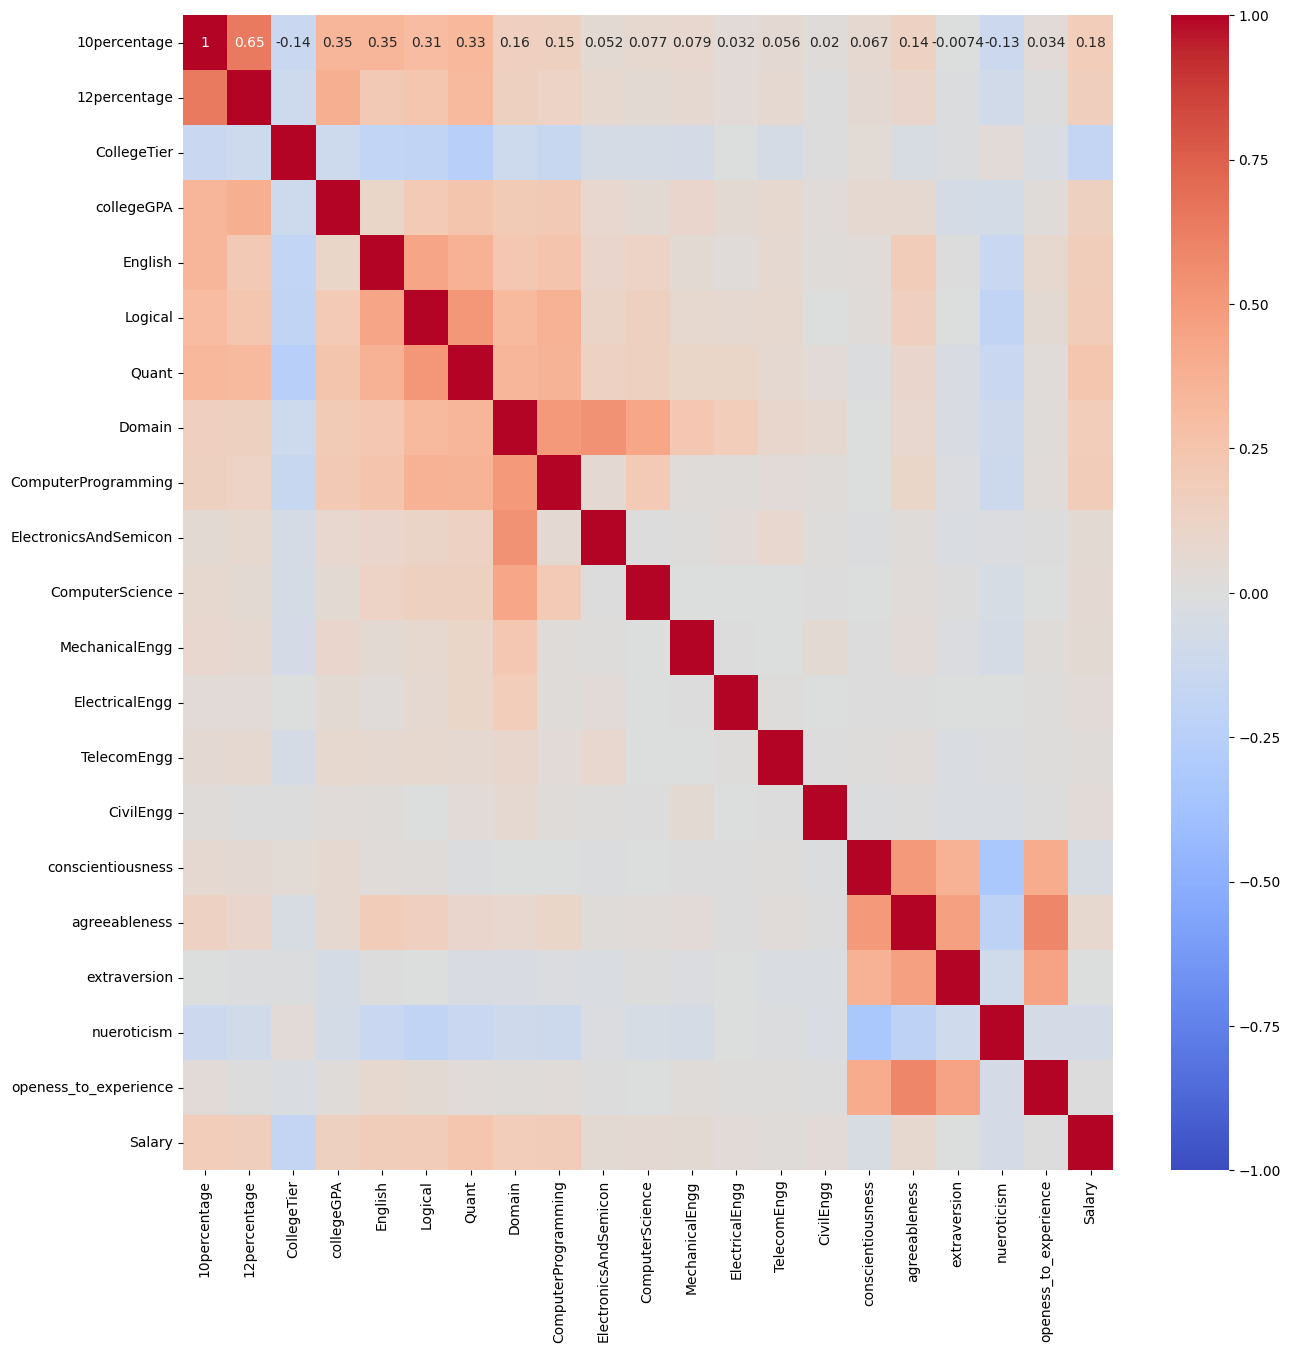

In [262]:
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

<Axes: >

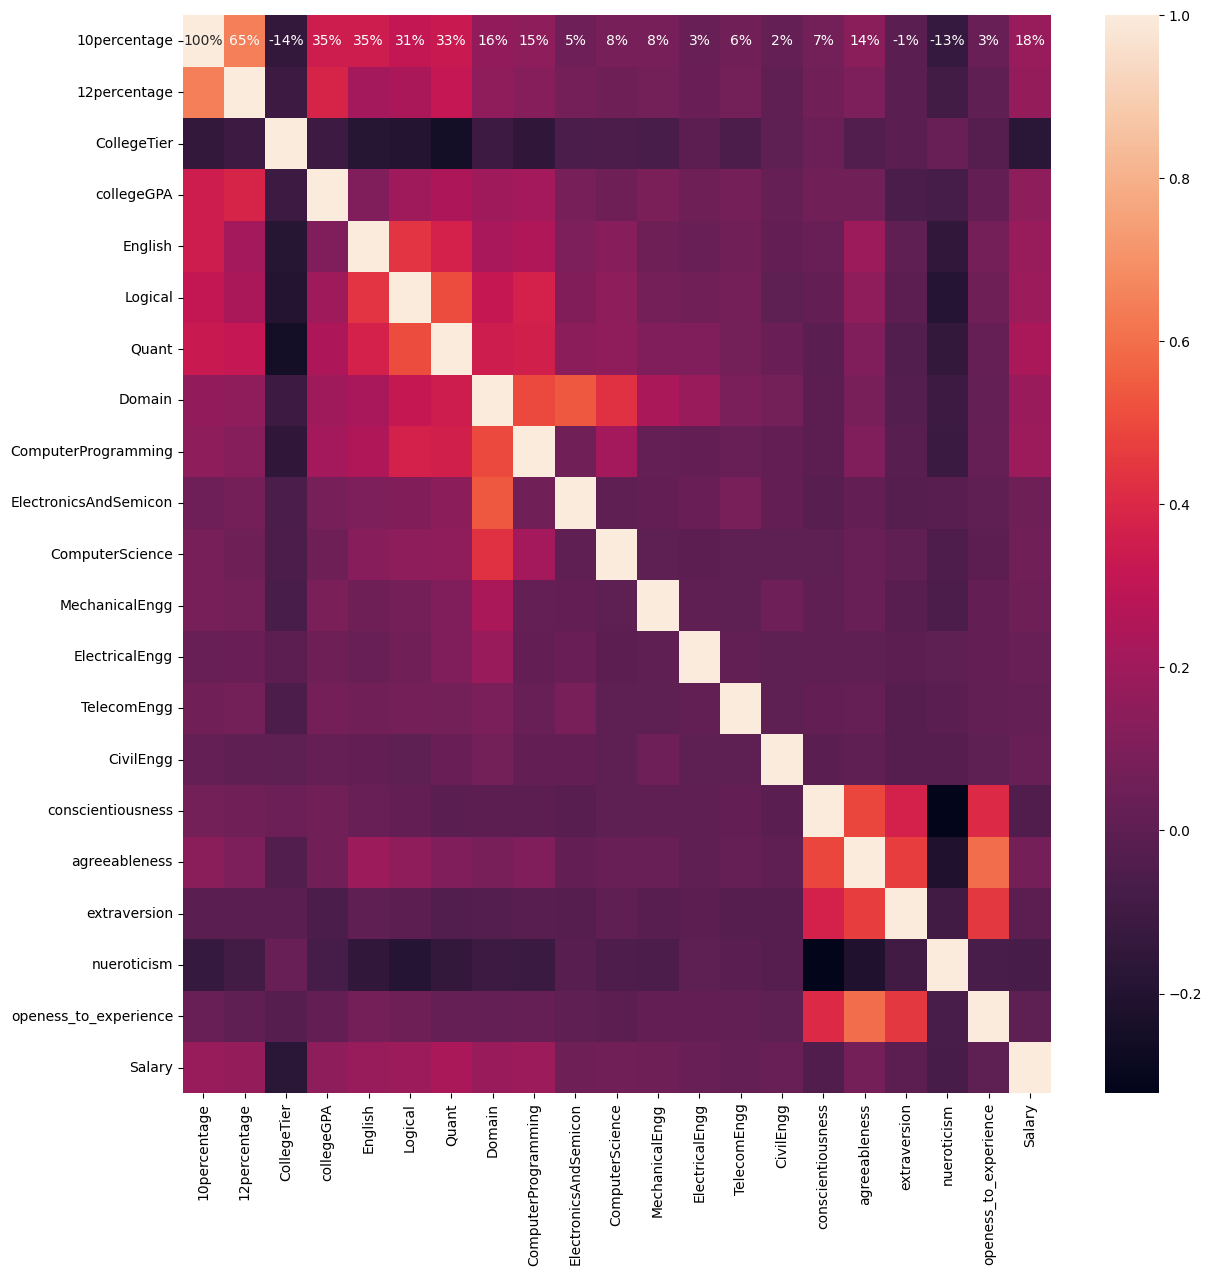

In [263]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(),annot=True,fmt='.0%')

<Axes: xlabel='Degree', ylabel='Specialization'>

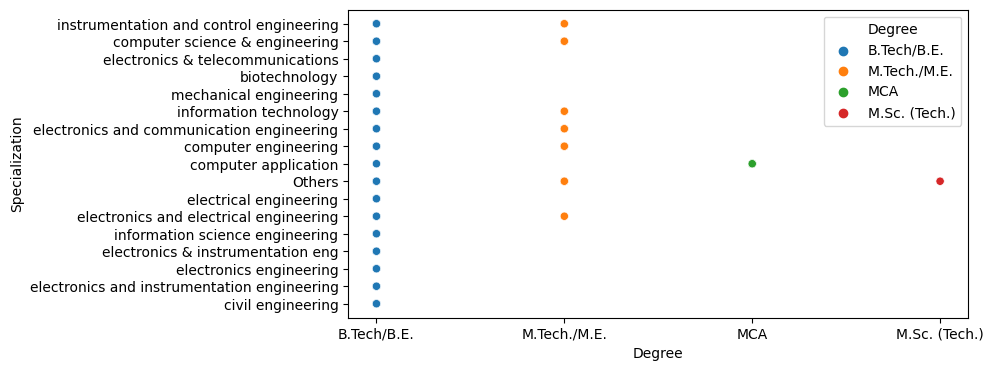

In [264]:
plt.figure(figsize = (8,4))
sns.scatterplot(x =df.Degree,y=df.Specialization, hue = df.Degree)

`Eighth insight:`

All of the above are 2 examples of correlation and we summerize these relations between all features.


10percentage is highly overall correlated with 12percentage **------>** `High correlation`

12percentage is highly overall correlated with 10percentage	**------>** `High correlation`

Logical is highly overall correlated with Quant	            **------>** `High correlation`

Quant is highly overall correlated with Logical	            **------>**        `High correlation`

Age is highly overall correlated with Graduation_age	   **------>**         `High correlation`

Graduation_age is highly overall correlated with Age	  **------>**          `High correlation`

Degree is highly overall correlated with Specialization	  **------>**          `High correlation`

Specialization is highly overall correlated with Degree	 **------>**           `High correlation`

CollegeTier is highly imbalanced (62.1%)	             **------>**           `Imbalance`

Degree is highly imbalanced (71.7%)	                     **------>**          ` Imbalance`

Graduation_age is highly skewed (γ1 = -53.02021438)	     **------>**           `Skewed`

ComputerProgramming has 564 (20.0%) zeros	             **------>**           `Zeros`

ElectronicsAndSemicon has 1962 (69.6%) zeros	         **------>**           `Zeros`

ComputerScience has 2155 (76.4%) zeros	                 **------>**           `Zeros`

MechanicalEngg has 2634 (93.4%) zeros	                **------>**            `Zeros`

ElectricalEngg has 2698 (95.7%) zeros	                **------>**            `Zeros`

TelecomEngg has 2545 (90.3%) zeros	                    **------>**            `Zeros`

CivilEngg has 2793 (99.1%) zeros	                    **------>**            `Zeros`


<a id="#Machine"></a>
## **`Machine Learning Model`**



>**Tip:** finally our data is ready for performing various of algorithms and models to
>train this data to be fit for any values which are appropirate fot this dataset properties.

### From RobustScaler module

Here, in this section we build a simple regression machine learning model to pridect the salary and 
calculate the score of this operation based on statistics columns that we worked on.

In [273]:
from sklearn.preprocessing import RobustScaler

Gender, degree, specialization need to be processed as they are of type ‘object’ not suitable for ML model input.

In [274]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)
df.Degree = le.fit_transform(df.Degree)
df.Specialization = le.fit_transform(df.Specialization)

In [275]:
df.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,0,87.80,84.00,1,0,15,73.82,650,665,810,...,401.174863,423.336066,349.879562,341.96,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,1,57.00,64.50,2,0,5,65.00,440,435,210,...,401.174863,423.336066,349.879562,341.96,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,1,77.33,85.17,2,0,8,61.94,485,475,505,...,401.174863,423.336066,260.000000,341.96,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,1,84.30,86.00,1,0,5,80.40,675,620,635,...,401.174863,423.336066,349.879562,341.96,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,0,82.00,75.00,2,0,1,64.30,575,495,365,...,401.174863,423.336066,349.879562,341.96,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


Then, we can try to exclude the columns which are in float not string to avoid exceptions and 
prepare a proper model to reach a high quality.

In [276]:
col_names = ['10percentage','12percentage','CollegeTier','collegeGPA','English','Logical','Quant','Domain','ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg','conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience','Salary']
dfe = pd.read_csv('./Data sets/Engineering_graduate_salary.csv' , header=None, names=col_names)
print("Dimensions of DF: ", dfe.shape)
print("\nInformation about DF: ")
print(dfe.info())
print("\nHead of DF: \n", dfe.head(5))

Dimensions of DF:  (2999, 21)

Information about DF: 
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2999 entries, ('ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation', '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA') to ('993701', 'm', '1992-05-27', '77.0', 'state board', '2009', '75.5', 'state board', '1111', '2', 'B.Tech/B.E.', 'information technology', '69.3')
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   10percentage           2999 non-null   object
 1   12percentage           2999 non-null   object
 2   CollegeTier            2999 non-null   object
 3   collegeGPA             2999 non-null   object
 4   English                2999 non-null   object
 5   Logical                2999 non-null   object
 6   Quant                  2999 non-null   object
 7   Domain                 2999 non-null   object
 8   ComputerProgramming  

In [270]:
import numpy as np

# Define a function to check if a value is numeric
def is_numeric(val):
    try:
        float(val)
        return True
    except ValueError:
        return False

# Apply the function to each value in the DataFrame
dfe = df.applymap(is_numeric)

# Convert the boolean DataFrame to a list of column names to remove
columns_to_remove = dfe.columns[dfe.any()].tolist()

# Remove the non-numeric columns from the DataFrame
dfe = dfe.drop(columns=columns_to_remove)

In [277]:
scaler = RobustScaler()
columns=dfe.columns

In [ ]:
model = scaler.fit(dfe[columns])
scaled_data = model.transform(dfe[columns])

In [ ]:
dff=pd.DataFrame(scaled_data,columns=columns)

In [ ]:
y = df["Salary"]
X = dff

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [291]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
y_pred

array([67.12406809, 67.09190504, 86.78370401, 75.00914199, 65.93298036,
       80.94545532, 89.88087199, 74.02130246, 61.40201559, 89.75845846,
       74.21624512, 81.80318474, 77.96986138, 91.1172503 , 84.9272381 ,
       87.37104753, 86.06024643, 69.11552422, 68.05163294, 61.19190501,
       82.97668123, 59.83890863, 74.9618731 , 66.63860192, 89.6568433 ,
       84.94298809, 91.20866449, 90.82919414, 70.3279437 , 88.70745759,
       70.26302343, 86.90418694, 80.01815933, 83.97604857, 74.65614581,
       92.1399089 , 80.62570262, 79.92643024, 74.05732592, 87.17162366,
       78.76439229, 89.9331199 , 90.84620331, 72.05988926, 78.97860705,
       79.47951326, 82.65194304, 86.95231674, 68.92721098, 74.04741232,
       76.00218548, 69.89307748, 89.36449018, 86.50883854, 54.65182361,
       82.61707817, 90.09711973, 90.254568  , 92.08760399, 74.02826211,
       56.21494888, 85.88029921, 92.83116946, 78.03074867, 84.27995982,
       83.34489751, 90.51129255, 62.03609055, 88.34680311, 57.70

In [292]:
y_test

array([67.  , 67.  , 86.83, 75.  , 65.8 , 81.  , 90.  , 74.  , 61.2 ,
       89.9 , 74.2 , 81.86, 78.  , 91.2 , 85.  , 87.5 , 86.13, 69.  ,
       68.  , 61.  , 83.  , 59.71, 75.  , 66.5 , 89.8 , 85.  , 91.4 ,
       91.  , 70.3 , 88.8 , 70.14, 87.  , 80.  , 84.  , 74.6 , 92.3 ,
       80.64, 80.  , 74.  , 87.3 , 78.8 , 90.  , 91.  , 72.  , 79.  ,
       79.5 , 82.66, 87.  , 68.8 , 74.  , 76.  , 69.8 , 89.5 , 86.66,
       54.4 , 82.6 , 90.27, 90.4 , 92.2 , 74.  , 56.  , 86.  , 93.  ,
       78.  , 84.3 , 83.4 , 90.6 , 61.83, 88.5 , 57.5 , 85.2 , 78.8 ,
       77.  , 86.  , 90.5 , 76.93, 75.  , 70.  , 59.  , 87.  , 80.4 ,
       87.6 , 70.  , 59.  , 88.6 , 72.  , 78.  , 78.83, 92.  , 86.8 ,
       78.8 , 80.5 , 87.  , 84.8 , 62.1 , 80.2 , 67.2 , 77.  , 84.96,
       92.  , 79.  , 66.5 , 84.  , 75.38, 82.  , 91.6 , 80.6 , 78.4 ,
       80.  , 72.5 , 66.46, 88.6 , 76.36, 80.63, 72.  , 61.  , 89.33,
       67.  , 76.  , 91.  , 65.  , 72.  , 84.6 , 78.3 , 71.  , 89.4 ,
       94.8 , 57.  ,

In [293]:
print("Model Score: ", lasso.score(X_test, y_test))

Model Score:  0.9998948698320832


Perfect, an excellent percentage of test score.

It is clear that the data which cleaned, wrangled and visualized is suitable for modeling.

In [294]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.10170569598087524

In [295]:
lasso.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [296]:
param_grid = {"alpha": [i*0.1 for i in range(0,30)]}
lasso_cv = GridSearchCV(Lasso(), param_grid, cv=5)
lasso_cv.fit(X_train, y_train)

C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,
                                   0.6000000000000001, 0.7000000000000001, 0.8,
                                   0.9, 1.0, 1.1, 1.2000000000000002, 1.3,
                                   1.4000000000000001, 1.5, 1.6,
                                   1.7000000000000002, 1.8, 1.9000000000000001,
                                   2.0, 2.1, 2.2, 2.3000000000000003,
                                   2.4000000000000004, 2.5, 2.6, 2.7,
                                   2.8000000000000003, 2.9000000000000004]})

In [297]:
print("Best Parameters:", lasso_cv.best_params_)
print("Best Score:", lasso_cv.best_score_)

Best Parameters: {'alpha': 0.0}
Best Score: 0.9999999999944365


And ploting the regression line to represent the data.

## From sklearn.model_selection module

### LinearRegression

In [299]:
X = df.iloc[:,:-1].values  #independent variable array
y = df.iloc[:,1].values

In [300]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=0)

In [301]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [303]:
y_pred = regressor.predict(X_test) 
y_pred

array([90.2 , 86.  , 92.  , 82.  , 72.  , 91.2 , 94.8 , 81.2 , 79.6 ,
       61.  , 84.  , 76.5 , 92.  , 86.66, 79.  , 82.  , 89.6 , 74.  ,
       81.  , 85.3 , 87.88, 62.34, 81.4 , 77.  , 75.67, 91.8 , 84.83,
       68.  , 87.33, 82.8 , 67.1 , 86.  , 66.66, 85.  , 87.  , 77.  ,
       86.8 , 80.  , 59.57, 72.3 , 81.2 , 80.8 , 83.  , 74.7 , 74.4 ,
       70.4 , 81.8 , 82.  , 94.6 , 83.  , 82.  , 88.33, 89.  , 77.8 ,
       73.6 , 72.  , 82.  , 56.5 , 60.7 , 92.48, 60.  , 65.  , 85.72,
       91.  , 73.6 , 78.8 , 81.86, 85.  , 65.  , 81.  , 81.2 , 73.4 ,
       75.  , 78.08, 62.  , 90.8 , 83.2 , 95.2 , 85.  , 82.  , 86.17,
       93.2 , 71.  , 58.2 , 78.2 , 65.  , 75.  , 79.  , 78.  , 84.  ,
       77.8 , 94.24, 84.6 , 82.24, 81.3 , 86.  , 80.07, 77.  , 88.7 ,
       86.4 , 76.93, 86.14, 82.67, 77.8 , 69.  , 89.  , 97.12, 63.  ,
       80.  , 51.  , 88.6 , 86.6 , 59.  , 82.8 , 64.  , 84.4 , 76.  ,
       55.  , 78.  , 62.1 , 82.  , 85.5 , 91.  , 72.15, 88.8 , 74.83,
       90.6 , 71.  ,

In [304]:
y_test

array([90.2 , 86.  , 92.  , 82.  , 72.  , 91.2 , 94.8 , 81.2 , 79.6 ,
       61.  , 84.  , 76.5 , 92.  , 86.66, 79.  , 82.  , 89.6 , 74.  ,
       81.  , 85.3 , 87.88, 62.34, 81.4 , 77.  , 75.67, 91.8 , 84.83,
       68.  , 87.33, 82.8 , 67.1 , 86.  , 66.66, 85.  , 87.  , 77.  ,
       86.8 , 80.  , 59.57, 72.3 , 81.2 , 80.8 , 83.  , 74.7 , 74.4 ,
       70.4 , 81.8 , 82.  , 94.6 , 83.  , 82.  , 88.33, 89.  , 77.8 ,
       73.6 , 72.  , 82.  , 56.5 , 60.7 , 92.48, 60.  , 65.  , 85.72,
       91.  , 73.6 , 78.8 , 81.86, 85.  , 65.  , 81.  , 81.2 , 73.4 ,
       75.  , 78.08, 62.  , 90.8 , 83.2 , 95.2 , 85.  , 82.  , 86.17,
       93.2 , 71.  , 58.2 , 78.2 , 65.  , 75.  , 79.  , 78.  , 84.  ,
       77.8 , 94.24, 84.6 , 82.24, 81.3 , 86.  , 80.07, 77.  , 88.7 ,
       86.4 , 76.93, 86.14, 82.67, 77.8 , 69.  , 89.  , 97.12, 63.  ,
       80.  , 51.  , 88.6 , 86.6 , 59.  , 82.8 , 64.  , 84.4 , 76.  ,
       55.  , 78.  , 62.1 , 82.  , 85.5 , 91.  , 72.15, 88.8 , 74.83,
       90.6 , 71.  ,

To calculate the coefficient of determination inwhich we can conclude the the best score of model.

In [305]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)

MAE: 3.2366528632282825e-14


In [306]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

MSE: 1.6179510782775085e-27


In [307]:
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

RMSE: 4.022376260716429e-14


In [308]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R² score:', r2)

R² score: 1.0


In [309]:
r2_percentage = r2 * 100
print('Model accuracy (in percentage):', r2_percentage)

Model accuracy (in percentage): 100.0


## Conclusion:
>
> we made analysis on our dataset and could to 
>predict the salary by using the info that is 
>attached with the dataset link on kaggle.
>
>Therefore, based on the data , info and our >analysis we could to reach the optimal value for >salary and the Model accuracy was 100%.

# **Team:**

* Ahmed Ashour -> `Team Leader`
* Amr belal
* Elsadat Ezzat
* Mustafa Ayman